In [1]:
import pickle
from jupyter_utils import jupyter_setup
jupyter_setup()
import numpy as np
import pandas as pd
from audio_processing import FeatureSet
import matplotlib.pyplot as plt
import librosa
import ipywidgets as widgets
import os
dataset_basepath = "data/Coswara_processed/pickles/"
from participant import Participant
import random

C:\Michi\acoustic_covid_detection\python


# Create a new AudioRecording to compare different settings

In [32]:
all_ids = os.listdir("data/Coswara_processed/Recordings")
random_id = random.choice(all_ids)

In [35]:
fig_title = "speech"  # -- low frequency bins only

types_of_recording = "combined_coughs"

audio_parameters_list = dict(
    type_of_features=["logmel"],  # logmel | mfcc
    n_time_steps=[224],  # 259 | 224
    n_features=[224],  # 15 | 224
    sample_rate=[22050],
    n_fft=[512 * 16],
    window_length= [1024, 1024, 2048, 1024],
    hop_size=      [128,  256, 256, 512],
    fmin=[0],
    fmax=[11000]
)

Duration of the Recording: 7.91
{'type_of_features': 'logmel', 'n_time_steps': 224, 'n_features': 224, 'sample_rate': 22050, 'n_fft': 8192, 'window_length': 1024, 'hop_size': 128, 'fmin': 0, 'fmax': 11000}
Duration of the Recording: 7.91
{'type_of_features': 'logmel', 'n_time_steps': 224, 'n_features': 224, 'sample_rate': 22050, 'n_fft': 8192, 'window_length': 1024, 'hop_size': 256, 'fmin': 0, 'fmax': 11000}
Duration of the Recording: 7.91
{'type_of_features': 'logmel', 'n_time_steps': 224, 'n_features': 224, 'sample_rate': 22050, 'n_fft': 8192, 'window_length': 2048, 'hop_size': 256, 'fmin': 0, 'fmax': 11000}
Duration of the Recording: 7.91
{'type_of_features': 'logmel', 'n_time_steps': 224, 'n_features': 224, 'sample_rate': 22050, 'n_fft': 8192, 'window_length': 1024, 'hop_size': 512, 'fmin': 0, 'fmax': 11000}


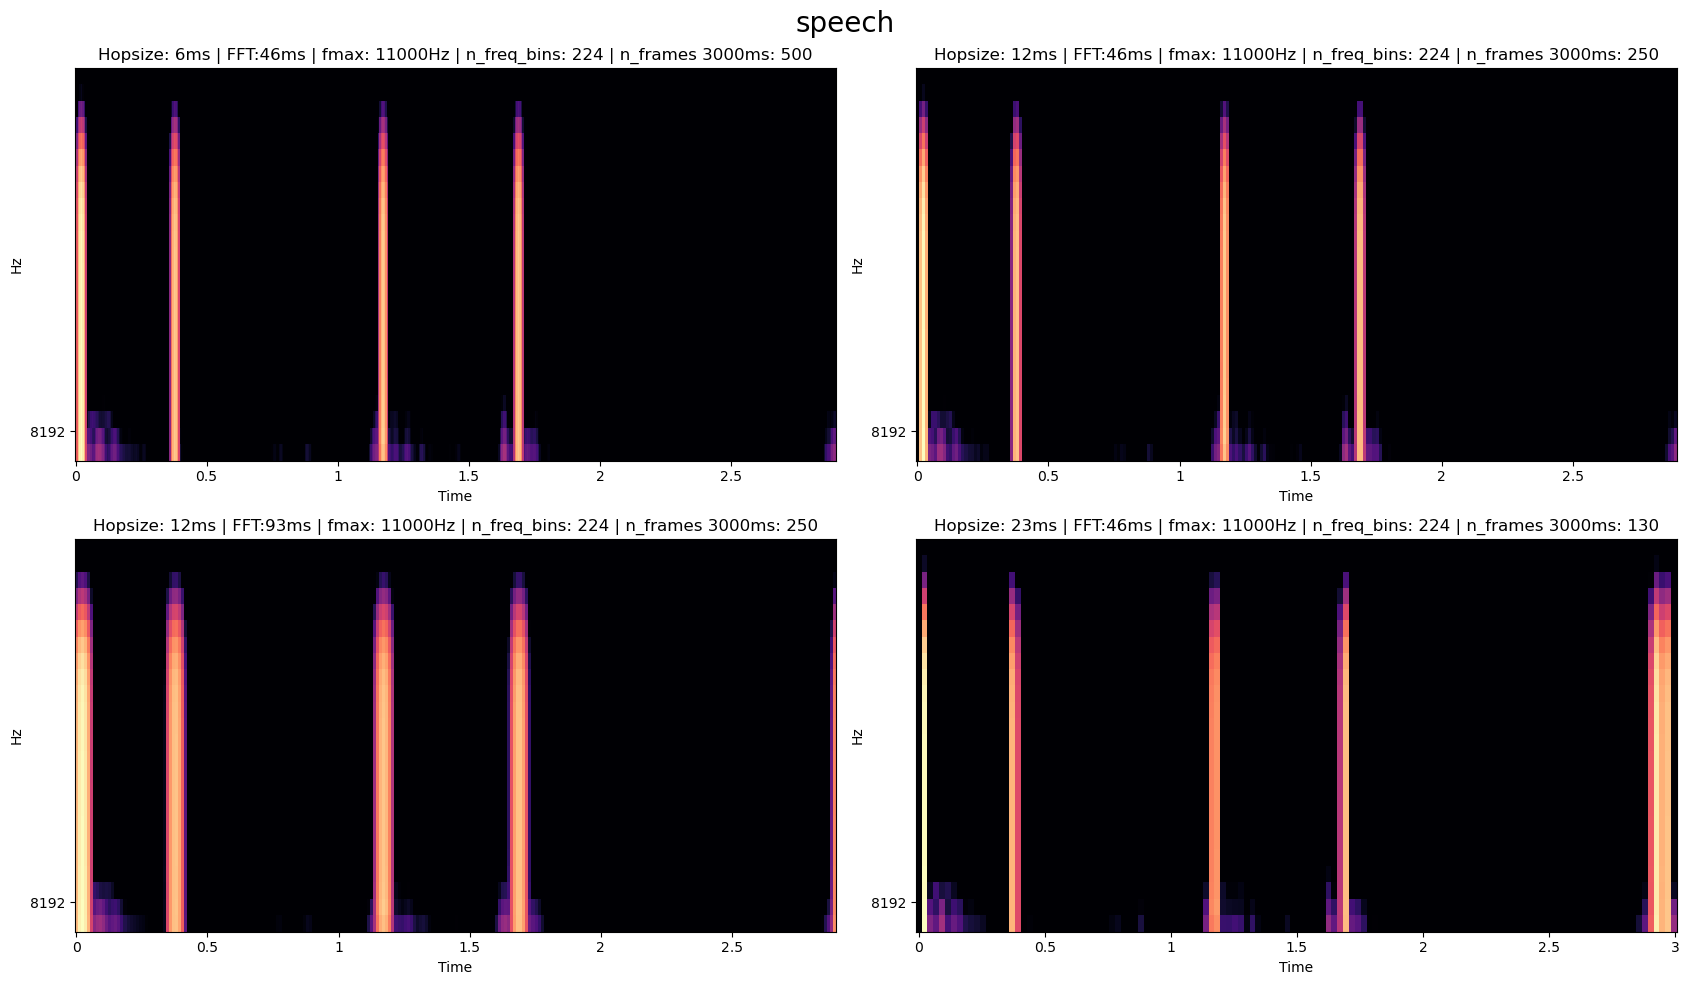

In [36]:
target_length = 3000    # in miliseconds
offset = 0              # look at the spectrogram starting at "offset" miliseconds until offset+target_length miliseconds
f = (8000, 12000)       # min and max frequency to display

n_subplots = max([len(val) for key, val in audio_parameters_list.items()])

n_rows = n_subplots // 2 + n_subplots % 2
n_cols = 2
# plt.figure(figsize=(18, 8))
fig, axes = plt.subplots(n_rows, n_cols, figsize=(17, 2.5*n_subplots))
ax_list = axes.flatten()

for i in range(n_subplots):
    audio_parameters = {key: val[i] if len(val) > 1 else val[0] for key, val in audio_parameters_list.items()}
    type_of_recording = "combined_coughs"

    participant = Participant(
                        # participant_id="00xKcQMmcAhX8CODgBBLOe7Dm0T2", 
                        participant_id=random_id, 
                        types_of_recording=types_of_recording,
                        audio_params=audio_parameters,
                        augmentations=None).recordings[types_of_recording]
    
    print(audio_parameters)
   
    hopsize_ms = round(audio_parameters['hop_size']/audio_parameters['sample_rate']*1000)
    fft_ms = round(audio_parameters['window_length']/audio_parameters['sample_rate']*1000)
    offset_frames = int(offset // hopsize_ms)
    n_frames = int(target_length // hopsize_ms)
    features = participant.features
    features = features[:, offset_frames:n_frames+offset_frames]
    mel_frequencies = librosa.mel_frequencies(n_mels=audio_parameters['n_features'], htk=True, fmin=participant.fmin, fmax=participant.fmax)
    f_idx = np.logical_and(mel_frequencies > f[0], mel_frequencies < f[1])
    mel_frequencies = mel_frequencies[f_idx]
    features = features[f_idx]

    # print(features.shape)
    # print(np.round(mel_frequencies))

    librosa.display.specshow(features, x_axis='time', y_axis="log", cmap="magma",
                             hop_length=audio_parameters['hop_size'], sr=audio_parameters['sample_rate'], y_coords=mel_frequencies, ax=ax_list[i])
    # plt.colorbar(format="%+2.f dB")
    # plt.clim(-60, 20)
    ax_list[i].set_title(f"Hopsize: {hopsize_ms}ms | FFT:{fft_ms}ms | fmax: {participant.fmax}Hz | n_freq_bins: {audio_parameters['n_features']} | n_frames {target_length}ms: {n_frames}")
if fig_title is not None:
    fig.suptitle(fig_title, fontsize=20)
plt.tight_layout()

In [ ]:
participant.play_audio()